In [7]:
print("Hakuna Matata")

Hakuna Matata


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Copy of devnagari digit.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [61]:
# data.data.districts
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [62]:
# generators -> divide all the data to batches
# each time batch is loaded on RAM and remove after job done and
# process continues until all batches done
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DevanagariHandwrittenDigitDataset/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DevanagariHandwrittenDigitDataset/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)



Found 17000 files belonging to 10 classes.
Found 3000 files belonging to 10 classes.


In [63]:
#normalize -> for value (0 to 255) to (0 to 1)
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [64]:
#prediction
import cv2

test_image1_0 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Train/digit_0/103265.png')
test_image2_9 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Test/digit_9/10407.png')
test_image2_2 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Test/digit_2/12535.png')





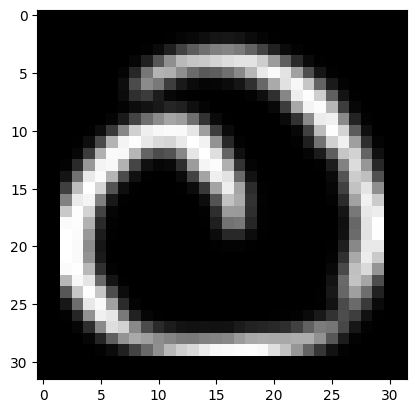

In [65]:
import matplotlib.pyplot as plt
plt.imshow(test_image1_0)

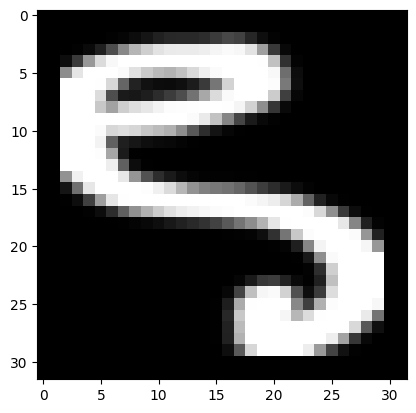

In [66]:
plt.imshow(test_image2_9)

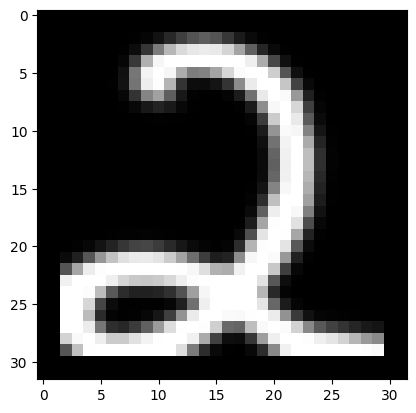

In [67]:
plt.imshow(test_image2_2)

In [68]:
test_image2_9.shape

(32, 32, 3)

In [69]:
#decreasing image size
test_image1 = cv2.resize(test_image2_9,(256,256)) # Resized to (256, 256)
test_image2 = cv2.resize(test_image1_0,(256,256)) # Resized to (256, 256)
test_image3 = cv2.resize(test_image2_2,(256,256)) # Resized to (256, 256)



In [70]:
#reshaping image shape
test_input1 = test_image1.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)
test_input2 = test_image2.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)
test_input3 = test_image3.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)

In [71]:
#using ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [72]:
# Normalize the pixel values to range [0,1]
normalization_layer = keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))


In [73]:

ann_model = Sequential()
ann_model.add(Flatten(input_shape=(256, 256, 3)))
ann_model.add(Dense(64, activation='sigmoid'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128, activation='sigmoid'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(256, activation='sigmoid'))
ann_model.add(Dropout(0.1))
ann_model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
# Compile the model
ann_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [75]:
# Summary of the model
ann_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │      12,582,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,626,890 (48.17 MB)

 Trainable params: 12,626,890 (48.17 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Train the model using the data generators
history = ann_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20
)

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - accuracy: 0.1575 - loss: 2.2836 - val_accuracy: 0.6607 - val_loss: 1.2190
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.6632 - loss: 1.0354 - val_accuracy: 0.8303 - val_loss: 0.4971
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.8073 - loss: 0.5544 - val_accuracy: 0.8827 - val_loss: 0.3501
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.8503 - loss: 0.4223 - val_accuracy: 0.9190 - val_loss: 0.2713
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.8816 - loss: 0.3424 - val_accuracy: 0.9347 - val_loss: 0.2188
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - accuracy: 0.9013 - loss: 0.2928 - val_accuracy: 0.9413 - val_loss: 0.1901
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.9169 - loss: 0.2510 - val_accuracy: 0.9477 - val_loss: 0.1706
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 160ms/step - accuracy: 0.9258 - loss: 0

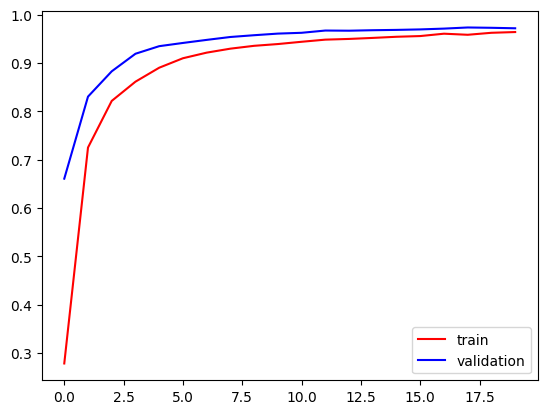

In [77]:
#accuracy graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

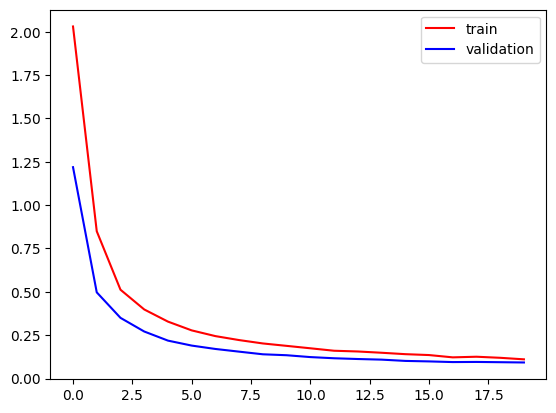

In [78]:
#losss graph
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [79]:
test_input3.shape

(1, 256, 256, 3)

In [81]:
pred = ann_model.predict(test_input3) #2
pred_digit = np.argmax(pred)
print(f"predicted output image value is {pred_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
predicted output image value is 2


In [82]:
import numpy as np
# Predict on test data
predictions = ann_model.predict(validation_ds)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


In [83]:
print("Prediction : ",predictions[0])
print("Predicted label : ",predicted_labels[0])
print("Prdection shape", predictions[0].shape)


Prediction :  [1.79320472e-04 1.70476044e-09 4.49139890e-07 4.52225202e-10
 1.46084349e-04 2.40763569e-07 8.26095459e-07 5.81290942e-06
 9.99653935e-01 1.33721205e-05]
Predicted label :  8
Prdection shape (10,)


In [84]:
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")


Predicted label for first image: 8


In [85]:
# Get the shape of the first image in the validation dataset
for image, label in validation_ds.take(2):
  print("Image shape:", image.shape)
  print("Label shape:", label.shape)


Image shape: (128, 256, 256, 3)
Label shape: (128,)
Image shape: (128, 256, 256, 3)
Label shape: (128,)


In [86]:
# print(f"True label for first image: {np.argmax(validation_ds[0])}")

In [87]:
model.save("ann_model.h5")

#Loading Saved Model

In [88]:
loaded_model = tf.keras.models.load_model("ann_model.h5")

In [89]:
predict1 = loaded_model.predict(test_input3) #image is 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


In [90]:
predicted_digit = np.argmax(predict1)
print("Predicted digit:", predicted_digit)

Predicted digit: 2
